In [19]:
from konlpy.tag import Okt
import math, sys
from konlpy.tag import Twitter

In [54]:
class BayesianFilter:     #붕어빵기계(클래스)
    def __init__(self):   #self:자신(만들어질 객체,붕어빵)
        self.words=set()  #붕어빵.길이=15센티, 단어 저장
        self.word_dict={} #카테고리(광고/중요) 단어 빈도수
        self.category_dict={}  
        
    def split(self, text):#어미/조사/구두점 제외,형태소분석
        result=[]
        okt=Okt()
        malist=okt.pos(text, norm=True, stem=True)
        for word in malist: 
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                result.append(word[0])
        return result
            #print(word[1])        
            #조사,어미,구두점을 제외한 나머지 단어만 
            #result에 저장
    def inc_word(self, word, category):#오늘, 광고
        #단어를 카테고리에 추가
        if not category in self.word_dict:
            self.word_dict[category]={} 
        if not word in self.word_dict[category]:
            self.word_dict[category][word]=0
        self.word_dict[category][word]+=1#{'광고':{'파격':1,'오늘':1} , '중요':{ }}
        self.words.add(word) #{'파격','오늘'}  
    
    def inc_category(self, category):
        if not category in self.category_dict:
            self.category_dict[category]=0
        self.category_dict[category]+=1       
        
    def fit(self,text,category):
        word_list=self.split(text)     
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)
        #print(word_list)
        
# 단어 리스트에 점수 매기기
    def score(self, words, category):
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
        return score
    
    # 예측하기 --- 
    def predict(self, text):#"재고 정리 할인,  배송"
        best_category = None
        max_score = -sys.maxsize 
        words = self.split(text)
        print("words of preFunc:",words)
        score_list = []
        for category in self.category_dict.keys():
            print("category:",category)
            score = self.score(words, category)
            score_list.append((category, score))
            if score > max_score:
                max_score = score
                best_category = category
        return best_category, score_list
    
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
        
    # 카테고리 계산
    def category_prob(self, category):
        print("점수:",self.category_dict.values())
        sum_categories = sum(self.category_dict.values())
        #print(category, "점수:", sum_categories)
        category_v = self.category_dict[category]
        return category_v / sum_categories
        
    # 카테고리 내부의 단어 출현 비율 계산 
    def word_prob(self, word, category):
        n = self.get_word_count(word, category) + 1 
        d = sum(self.word_dict[category].values()) + len(self.words)
        return n / d    
    

In [55]:
bf=BayesianFilter()   #붕어빵기계에서 붕어빵 1개 만들어라
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("무료 쿠폰 선물 & 무료 배송", "광고")
bf.fit("아사히 맥주 세일", "광고")
bf.fit("회의 일정 확인 부탁드립니다", "중요")
bf.fit("오늘 일정이 없습니다", "중요")
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
res, scorelist=bf.predict("재고 정리 할인,  배송")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률

# B=중요, A=재고,정리,할인,배송
# P(B|A)=P(B)*P(A|B), P(A|B)=P(Aa1|B)P(Aa2|B)...P(Aan|B)
# P(중요|재고,정리,할인,배송)=P(중요)*P(재고,정리,할인,배송|중요)

res, scorelist=bf.predict("오늘 멀티캠에서 회의는 어땠습니까?")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률


words of preFunc: ['재고', '정리', '할인', '배송']
category: 광고
점수: dict_values([8, 7])
category: 중요
점수: dict_values([8, 7])
결과: 광고
[('광고', -16.058261071143168), ('중요', -17.33467895761303)]
words of preFunc: ['오늘', '멀티', '캠', '회의', '어떻다']
category: 광고
점수: dict_values([8, 7])
category: 중요
점수: dict_values([8, 7])
결과: 중요
[('광고', -21.563592607075527), ('중요', -18.99290703421656)]


## Keras 선형회귀, 로지스틱 회귀, 소프트맥스



In [24]:
# Seq2Seq
# Word2Vec
# Doc2Vec
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np


Using TensorFlow backend.


In [25]:
x=np.array([1,2,3,4,5,6,7,8,9]) # 공부시간
y=np.array([12,23,34,45,56,77,88,100,90]) # 점수

# 궁금증 : 7.5 시간 공부할 때 점수?

In [28]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear')) # 입력차원
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd,loss = 'mse', metrics = ['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)




W0812 16:05:32.407972  7356 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 16:05:32.416948  7356 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
9/9 [==============================] - 1s 69ms/step - loss: 387.8969 - mean_squared_error: 387.8969
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 95.0866 - mean_squared_error: 95.0866
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 94.4610 - mean_squared_error: 94.4610
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 93.9235 - mean_squared_error: 93.9235
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 93.4668 - mean_squared_error: 93.4668
Epoch 6/300
9/9 [==============================] - 0s 779us/step - loss: 93.0841 - mean_squared_error: 93.0841
Epoch 7/300
9/9 [==============================] - 0s 994us/step - loss: 92.7691 - mean_squared_error: 92.7691
Epoch 8/300
9/9 [==============================] - 0s 775us/step - loss: 92.5161 - mean_squared_error: 92.5161
Epoch 9/300
9/9 [==============================] - 0s 886us/step - loss: 92.3196 - mean_squared_error: 92.3196
Epoch 10

9/9 [==============================] - 0s 776us/step - loss: 103.8927 - mean_squared_error: 103.8927
Epoch 75/300
9/9 [==============================] - 0s 664us/step - loss: 104.0094 - mean_squared_error: 104.0094
Epoch 76/300
9/9 [==============================] - 0s 665us/step - loss: 104.1228 - mean_squared_error: 104.1228
Epoch 77/300
9/9 [==============================] - 0s 887us/step - loss: 104.2330 - mean_squared_error: 104.2330
Epoch 78/300
9/9 [==============================] - 0s 886us/step - loss: 104.3401 - mean_squared_error: 104.3401
Epoch 79/300
9/9 [==============================] - 0s 885us/step - loss: 104.4440 - mean_squared_error: 104.4440
Epoch 80/300
9/9 [==============================] - 0s 776us/step - loss: 104.5450 - mean_squared_error: 104.5450
Epoch 81/300
9/9 [==============================] - 0s 886us/step - loss: 104.6429 - mean_squared_error: 104.6429
Epoch 82/300
9/9 [==============================] - 0s 776us/step - loss: 104.7380 - mean_squared_err

9/9 [==============================] - 0s 886us/step - loss: 107.6553 - mean_squared_error: 107.6553
Epoch 217/300
9/9 [==============================] - 0s 665us/step - loss: 107.6564 - mean_squared_error: 107.6564
Epoch 218/300
9/9 [==============================] - 0s 776us/step - loss: 107.6575 - mean_squared_error: 107.6575
Epoch 219/300
9/9 [==============================] - 0s 776us/step - loss: 107.6586 - mean_squared_error: 107.6586
Epoch 220/300
9/9 [==============================] - 0s 776us/step - loss: 107.6596 - mean_squared_error: 107.6596
Epoch 221/300
9/9 [==============================] - 0s 887us/step - loss: 107.6606 - mean_squared_error: 107.6606
Epoch 222/300
9/9 [==============================] - 0s 774us/step - loss: 107.6616 - mean_squared_error: 107.6616
Epoch 223/300
9/9 [==============================] - 0s 997us/step - loss: 107.6625 - mean_squared_error: 107.6625
Epoch 224/300
9/9 [==============================] - 0s 776us/step - loss: 107.6634 - mean_squ

Epoch 287/300
9/9 [==============================] - 0s 776us/step - loss: 107.6869 - mean_squared_error: 107.6869
Epoch 288/300
9/9 [==============================] - 0s 774us/step - loss: 107.6870 - mean_squared_error: 107.6870
Epoch 289/300
9/9 [==============================] - 0s 776us/step - loss: 107.6871 - mean_squared_error: 107.6871
Epoch 290/300
9/9 [==============================] - 0s 776us/step - loss: 107.6872 - mean_squared_error: 107.6872
Epoch 291/300
9/9 [==============================] - 0s 997us/step - loss: 107.6873 - mean_squared_error: 107.6873
Epoch 292/300
9/9 [==============================] - 0s 997us/step - loss: 107.6874 - mean_squared_error: 107.6874
Epoch 293/300
9/9 [==============================] - 0s 665us/step - loss: 107.6875 - mean_squared_error: 107.6875
Epoch 294/300
9/9 [==============================] - 0s 887us/step - loss: 107.6876 - mean_squared_error: 107.6876
Epoch 295/300
9/9 [==============================] - 0s 776us/step - loss: 107.6

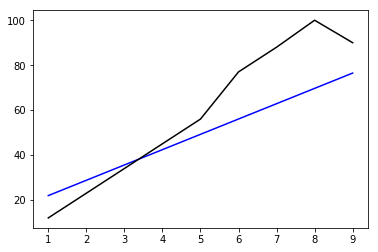

In [33]:
import matplotlib.pyplot as plt
plt.plot( x, model.predict(x),'b', x, y, 'k')

In [34]:
model.predict([7.5])

array([[66.25939]], dtype=float32)

W0812 16:26:53.474542  7356 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
9/9 [==============================] - 0s 24ms/step - loss: 1.4641 - binary_crossentropy: 1.4641
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 1.2383 - binary_crossentropy: 1.2383
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 1.0373 - binary_crossentropy: 1.0373
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 0.8736 - binary_crossentropy: 0.8736
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7573 - binary_crossentropy: 0.7573
Epoch 6/300
9/9 [==============================] - 0s 997us/step - loss: 0.6878 - binary_crossentropy: 0.6878
Epoch 7/300
9/9 [==============================] - 0s 776us/step - loss: 0.6518 - binary_crossentropy: 0.6518
Epoch 8/300
9/9 [==============================] - 0s 997us/step - loss: 0.6340 - binary_crossentropy: 0.6340
Epoch 9/300
9/9 [==============================] - 0s 886us/step - loss: 0.6246 - binary_crossentropy: 0.6246
Epoch 10/300
9/9 [=

9/9 [==============================] - 0s 997us/step - loss: 0.4786 - binary_crossentropy: 0.4786
Epoch 76/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4770 - binary_crossentropy: 0.4770
Epoch 77/300
9/9 [==============================] - 0s 886us/step - loss: 0.4754 - binary_crossentropy: 0.4754
Epoch 78/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4739 - binary_crossentropy: 0.4739
Epoch 79/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4723 - binary_crossentropy: 0.4723
Epoch 80/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4708 - binary_crossentropy: 0.4708
Epoch 81/300
9/9 [==============================] - 0s 886us/step - loss: 0.4693 - binary_crossentropy: 0.4693
Epoch 82/300
9/9 [==============================] - 0s 997us/step - loss: 0.4678 - binary_crossentropy: 0.4678
Epoch 83/300
9/9 [==============================] - 0s 1ms/step - loss: 0.4663 - binary_crossentropy: 0.4663
Epoch 84/300
9/9 [======

9/9 [==============================] - 0s 776us/step - loss: 0.3341 - binary_crossentropy: 0.3341
Epoch 222/300
9/9 [==============================] - 0s 886us/step - loss: 0.3335 - binary_crossentropy: 0.3335
Epoch 223/300
9/9 [==============================] - 0s 776us/step - loss: 0.3329 - binary_crossentropy: 0.3329
Epoch 224/300
9/9 [==============================] - 0s 997us/step - loss: 0.3323 - binary_crossentropy: 0.3323
Epoch 225/300
9/9 [==============================] - 0s 776us/step - loss: 0.3317 - binary_crossentropy: 0.3317
Epoch 226/300
9/9 [==============================] - 0s 886us/step - loss: 0.3311 - binary_crossentropy: 0.3311
Epoch 227/300
9/9 [==============================] - 0s 997us/step - loss: 0.3305 - binary_crossentropy: 0.3305
Epoch 228/300
9/9 [==============================] - 0s 887us/step - loss: 0.3299 - binary_crossentropy: 0.3299
Epoch 229/300
9/9 [==============================] - 0s 887us/step - loss: 0.3293 - binary_crossentropy: 0.3293
Epoch 

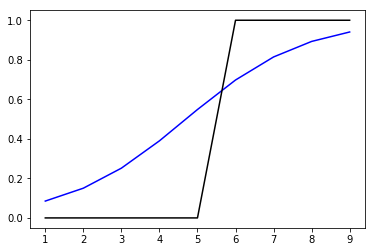

In [35]:
# 로지스틱 회귀 ( 0 or 1 )
x=np.array([1,2,3,4,5,6,7,8,9]) # 공부시간
y=np.array([0,0,0,0,0,1,1,1,1]) # 합격여부

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid')) # 입력차원
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd,loss = 'binary_crossentropy', 
              metrics = ['binary_crossentropy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)



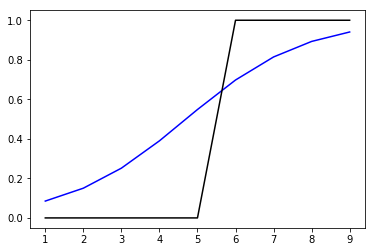

In [36]:
import matplotlib.pyplot as plt
plt.plot( x, model.predict(x),'b', x, y, 'k')

In [39]:
model.predict([15, 17])
model.predict([0.5, 1.5])

array([[0.06330802],
       [0.113805  ]], dtype=float32)

In [41]:
# hx = w1x1 + w2x2 + w3x3 + b

x=np.array([[100,90,80],[55,45,36],[77,88,90]]) # 공부시간
y=np.array([92,70,88]) # 점수

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear')) # 출력 / 입력차원
sgd = optimizers.SGD(lr = 0.00001)
model.compile(optimizer = sgd,loss = 'mse', metrics = ['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)



Epoch 1/300
3/3 [==============================] - 0s 37ms/step - loss: 453.2791 - mean_squared_error: 453.2791
Epoch 2/300
3/3 [==============================] - 0s 1ms/step - loss: 233.8866 - mean_squared_error: 233.8866
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: 203.2540 - mean_squared_error: 203.2540
Epoch 4/300
3/3 [==============================] - 0s 3ms/step - loss: 196.6396 - mean_squared_error: 196.6396
Epoch 5/300
3/3 [==============================] - 0s 3ms/step - loss: 194.5818 - mean_squared_error: 194.5818
Epoch 6/300
3/3 [==============================] - 0s 2ms/step - loss: 193.5862 - mean_squared_error: 193.5862
Epoch 7/300
3/3 [==============================] - 0s 1ms/step - loss: 192.8615 - mean_squared_error: 192.8615
Epoch 8/300
3/3 [==============================] - 0s 1ms/step - loss: 192.2126 - mean_squared_error: 192.2126
Epoch 9/300
3/3 [==============================] - 0s 1ms/step - loss: 191.5906 - mean_squared_error: 191.5906


Epoch 74/300
3/3 [==============================] - 0s 996us/step - loss: 166.9111 - mean_squared_error: 166.9111
Epoch 75/300
3/3 [==============================] - 0s 998us/step - loss: 166.6930 - mean_squared_error: 166.6930
Epoch 76/300
3/3 [==============================] - 0s 2ms/step - loss: 166.4778 - mean_squared_error: 166.4778
Epoch 77/300
3/3 [==============================] - 0s 1ms/step - loss: 166.2661 - mean_squared_error: 166.2661
Epoch 78/300
3/3 [==============================] - 0s 998us/step - loss: 166.0573 - mean_squared_error: 166.0573
Epoch 79/300
3/3 [==============================] - 0s 2ms/step - loss: 165.8516 - mean_squared_error: 165.8516
Epoch 80/300
3/3 [==============================] - 0s 2ms/step - loss: 165.6491 - mean_squared_error: 165.6491
Epoch 81/300
3/3 [==============================] - 0s 2ms/step - loss: 165.4493 - mean_squared_error: 165.4493
Epoch 82/300
3/3 [==============================] - 0s 2ms/step - loss: 165.2528 - mean_squared_er

3/3 [==============================] - 0s 1000us/step - loss: 153.2311 - mean_squared_error: 153.2311
Epoch 218/300
3/3 [==============================] - 0s 997us/step - loss: 153.1970 - mean_squared_error: 153.1970
Epoch 219/300
3/3 [==============================] - 0s 998us/step - loss: 153.1631 - mean_squared_error: 153.1631
Epoch 220/300
3/3 [==============================] - 0s 2ms/step - loss: 153.1298 - mean_squared_error: 153.1298
Epoch 221/300
3/3 [==============================] - 0s 2ms/step - loss: 153.0967 - mean_squared_error: 153.0967
Epoch 222/300
3/3 [==============================] - 0s 1ms/step - loss: 153.0640 - mean_squared_error: 153.0640
Epoch 223/300
3/3 [==============================] - 0s 998us/step - loss: 153.0319 - mean_squared_error: 153.0319
Epoch 224/300
3/3 [==============================] - 0s 997us/step - loss: 152.9999 - mean_squared_error: 152.9999
Epoch 225/300
3/3 [==============================] - 0s 996us/step - loss: 152.9683 - mean_squared_

3/3 [==============================] - 0s 1ms/step - loss: 151.4972 - mean_squared_error: 151.4972
Epoch 290/300
3/3 [==============================] - 0s 995us/step - loss: 151.4808 - mean_squared_error: 151.4808
Epoch 291/300
3/3 [==============================] - 0s 1ms/step - loss: 151.4646 - mean_squared_error: 151.4646
Epoch 292/300
3/3 [==============================] - 0s 1ms/step - loss: 151.4483 - mean_squared_error: 151.4483
Epoch 293/300
3/3 [==============================] - 0s 997us/step - loss: 151.4324 - mean_squared_error: 151.4324
Epoch 294/300
3/3 [==============================] - 0s 1ms/step - loss: 151.4165 - mean_squared_error: 151.4165
Epoch 295/300
3/3 [==============================] - 0s 1ms/step - loss: 151.4010 - mean_squared_error: 151.4010
Epoch 296/300
3/3 [==============================] - 0s 1ms/step - loss: 151.3854 - mean_squared_error: 151.3854
Epoch 297/300
3/3 [==============================] - 0s 1ms/step - loss: 151.3699 - mean_squared_error: 15

In [43]:
# import matplotlib.pyplot as plt
# plt.plot( x, model.predict(x),'b', x, y, 'k')
model.predict(x)

array([[104.828575],
       [ 56.897995],
       [ 85.23562 ]], dtype=float32)

In [50]:
# 다중 로지스틱 회귀 ( 0 or 1 )
x=np.array([[0,0],[0,1],[1,0],[1,1]]) # 공부시간
y=np.array([0,1,1,1]) # 합격여부

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 입력차원
sgd = optimizers.SGD(lr = 0.05)
model.compile(optimizer = sgd,loss = 'binary_crossentropy', 
              metrics = ['binary_crossentropy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 70ms/step - loss: 0.4509 - binary_crossentropy: 0.4509
Epoch 2/300
4/4 [==============================] - 0s 994us/step - loss: 0.4413 - binary_crossentropy: 0.4413
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4327 - binary_crossentropy: 0.4327
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4250 - binary_crossentropy: 0.4250
Epoch 5/300
4/4 [==============================] - 0s 998us/step - loss: 0.4178 - binary_crossentropy: 0.4178
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4113 - binary_crossentropy: 0.4113
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4054 - binary_crossentropy: 0.4054
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3998 - binary_crossentropy: 0.3998
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3947 - binary_crossentropy: 0.3947
Epoch 10/300
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.1975 - binary_crossentropy: 0.1975
Epoch 149/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1968 - binary_crossentropy: 0.1968
Epoch 150/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1961 - binary_crossentropy: 0.1961
Epoch 151/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - binary_crossentropy: 0.1954
Epoch 152/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1947 - binary_crossentropy: 0.1947
Epoch 153/300
4/4 [==============================] - 0s 997us/step - loss: 0.1941 - binary_crossentropy: 0.1941
Epoch 154/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1934 - binary_crossentropy: 0.1934
Epoch 155/300
4/4 [==============================] - 0s 997us/step - loss: 0.1927 - binary_crossentropy: 0.1927
Epoch 156/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1921 - binary_crossentropy: 0.1921
Epoch 157/300
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.1290 - binary_crossentropy: 0.1290
Epoch 296/300
4/4 [==============================] - 0s 997us/step - loss: 0.1287 - binary_crossentropy: 0.1287
Epoch 297/300
4/4 [==============================] - 0s 746us/step - loss: 0.1284 - binary_crossentropy: 0.1284
Epoch 298/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1281 - binary_crossentropy: 0.1281
Epoch 299/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1277 - binary_crossentropy: 0.1277
Epoch 300/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1274 - binary_crossentropy: 0.1274


In [46]:
model.predict(x)

array([[0.5382602 ],
       [0.83517367],
       [0.80773133],
       [0.9480804 ]], dtype=float32)

In [53]:

import pandas as pd
                 
data = pd.read_csv('iris.csv')
data

FileNotFoundError: [Errno 2] File b'iris.csv' does not exist: b'iris.csv'